<a href="https://colab.research.google.com/github/rongalajaswanth/Prodigy_ML_02/blob/main/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [ ]:
data = pd.read_csv('Mall_Customers.csv')

In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
inertia_values = []
k_range = range(1, 11)  # You can adjust the range as needed
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

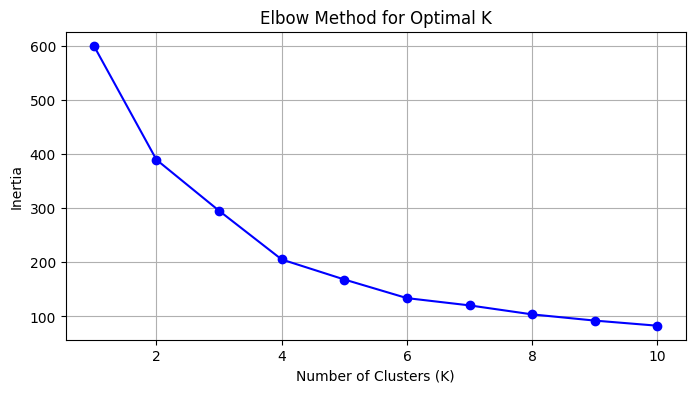

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia_values, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid()
plt.show()

In [ ]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
data['Cluster'] = cluster_labels

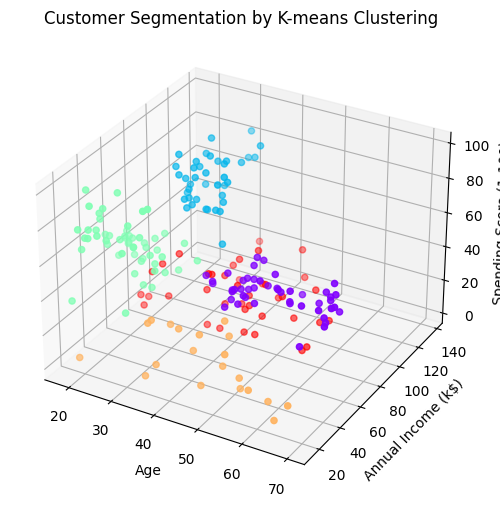

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['Age'], data['Annual Income (k$)'], data['Spending Score (1-100)'],
           c=data['Cluster'], cmap='rainbow')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.title('Customer Segmentation by K-means Clustering')
plt.show()

In [ ]:
for cluster_id in range(optimal_k):
    cluster_data = data[data['Cluster'] == cluster_id]
    print(f"Cluster {cluster_id}:")
    print(cluster_data.describe())

Cluster 0:
       CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
count   47.000000  47.000000           47.000000               47.000000   
mean    83.872340  55.638298           54.382979               48.851064   
std     24.425234   8.913657            8.818344                6.303825   
min     41.000000  40.000000           38.000000               35.000000   
25%     64.500000  49.000000           47.500000               44.500000   
50%     81.000000  54.000000           54.000000               48.000000   
75%    102.500000  65.000000           62.000000               54.000000   
max    161.000000  70.000000           79.000000               60.000000   

       Cluster  
count     47.0  
mean       0.0  
std        0.0  
min        0.0  
25%        0.0  
50%        0.0  
75%        0.0  
max        0.0  
Cluster 1:
       CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
count    40.00000  40.000000           40.000000               4